<a href="https://colab.research.google.com/github/stevengregori92/Learn-TimeSeriesForecast/blob/main/ARIMA_for_AAPL_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import Package

In [1]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 6.6 MB/s eta 0:00:00


#Import Dataset

In [2]:
!gdown https://drive.google.com/uc?id=1J3VFSqOiVeIoQqWuVZnEojzAT9r8z3l7
!unzip /content/stock.zip

Downloading...
From: https://drive.google.com/uc?id=1J3VFSqOiVeIoQqWuVZnEojzAT9r8z3l7
To: /content/stock.zip
100% 3.17M/3.17M [00:00<00:00, 12.7MB/s]
Archive:  /content/stock.zip
  inflating: AABA_2006-01-01_to_2018-01-01.csv  
  inflating: AAPL_2006-01-01_to_2018-01-01.csv  
  inflating: AMZN_2006-01-01_to_2018-01-01.csv  
  inflating: AXP_2006-01-01_to_2018-01-01.csv  
  inflating: BA_2006-01-01_to_2018-01-01.csv  
  inflating: CAT_2006-01-01_to_2018-01-01.csv  
  inflating: CSCO_2006-01-01_to_2018-01-01.csv  
  inflating: CVX_2006-01-01_to_2018-01-01.csv  
  inflating: DIS_2006-01-01_to_2018-01-01.csv  
  inflating: GE_2006-01-01_to_2018-01-01.csv  
  inflating: GOOGL_2006-01-01_to_2018-01-01.csv  
  inflating: GS_2006-01-01_to_2018-01-01.csv  
  inflating: HD_2006-01-01_to_2018-01-01.csv  
  inflating: IBM_2006-01-01_to_2018-01-01.csv  
  inflating: INTC_2006-01-01_to_2018-01-01.csv  
  inflating: JNJ_2006-01-01_to_2018-01-01.csv  
  inflating: JPM_2006-01-01_to_2018-01-01.csv  
  

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from pmdarima import auto_arima

<ipython-input-4-025ab8b25465>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df = df.resample('M').mean()


<Axes: xlabel='Date'>

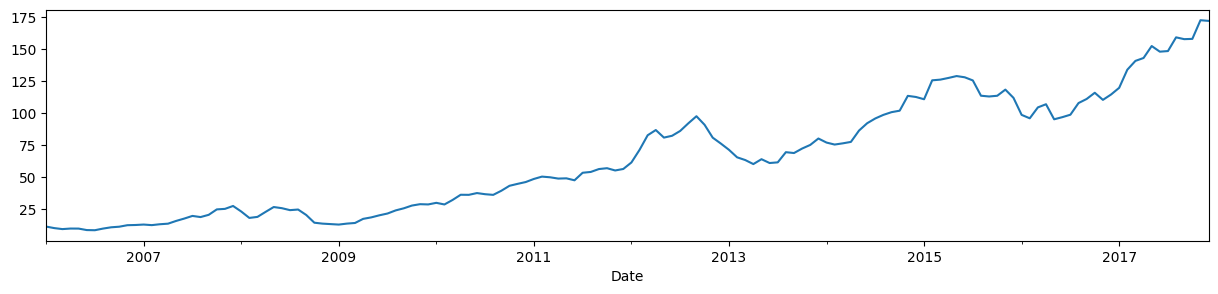

In [4]:
df = pd.read_csv('AAPL_2006-01-01_to_2018-01-01.csv', index_col='Date', parse_dates=['Date'])
df = df.resample('M').mean()
series = df.Close
X_train, X_test = series[:-25], series[-25:]
series.plot(figsize=(15,3))

###Training

In [5]:
arima = auto_arima(X_train, seasonal=True, m=12, information_criterion='aicc', trace=True, suppress_warning=True, random_state=42)

Performing stepwise search to minimize aicc
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AICC=inf, Time=2.13 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AICC=652.824, Time=0.08 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AICC=644.437, Time=0.35 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AICC=643.046, Time=0.31 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AICC=657.361, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AICC=642.156, Time=0.15 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AICC=643.697, Time=0.25 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AICC=inf, Time=1.66 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AICC=634.887, Time=0.36 sec
 ARIMA(1,1,1)(1,0,0)[12] intercept   : AICC=636.795, Time=1.11 sec
 ARIMA(1,1,1)(0,0,1)[12] intercept   : AICC=636.524, Time=0.86 sec
 ARIMA(1,1,1)(1,0,1)[12] intercept   : AICC=inf, Time=2.11 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AICC=642.616, Time=0.13 sec
 ARIMA(2,1,1)(0,0,0)[12] intercept   : AICC=635.017, Time=0.42 sec
 ARIMA(1,1,2)(0,0,0)[12] inter

##Forecast

In [6]:
n_forecast = len(X_test) + 20
pred = arima.predict(n_forecast)

dates = pd.date_range(X_train.index[-1], periods=n_forecast, freq='M')
pred = pd.Series(pred, index=dates)

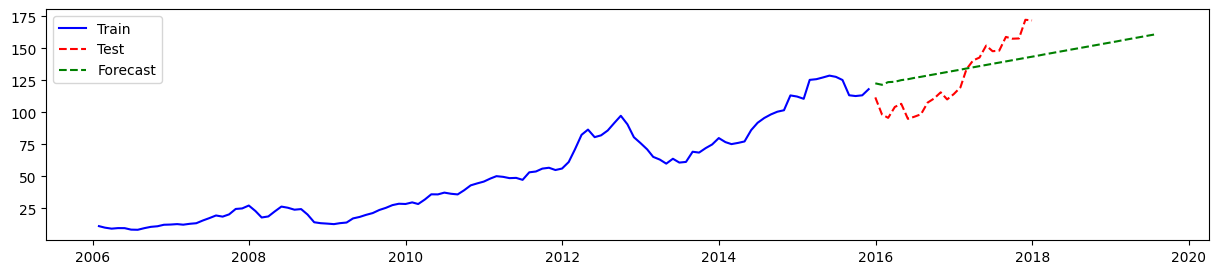

In [7]:
plt.figure(figsize=(15,3))
plt.plot(X_train, 'b-', label='Train')
plt.plot(X_test, 'r--', label='Test')
plt.plot(pred, 'g--', label='Forecast')
plt.legend()